In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mask_2deg = np.loadtxt('mask_Gottlieb_2024_2deg.csv', delimiter=',', encoding='utf-8-sig')

In [23]:
mask_2deg.shape

(1800, 2)

In [24]:
mask = np.zeros((180, 360))
for ilat, ilon in mask_2deg:
    mask[int(ilat+89),int(ilon+179)] = 1
    mask[int(ilat+89),int(ilon+179)+1] = 1
    mask[int(ilat+89)+1,int(ilon+179)] = 1
    mask[int(ilat+89)+1,int(ilon+179)+1] = 1

mask = mask[-60:, :]
np.savetxt('mask_1deg.txt', mask)

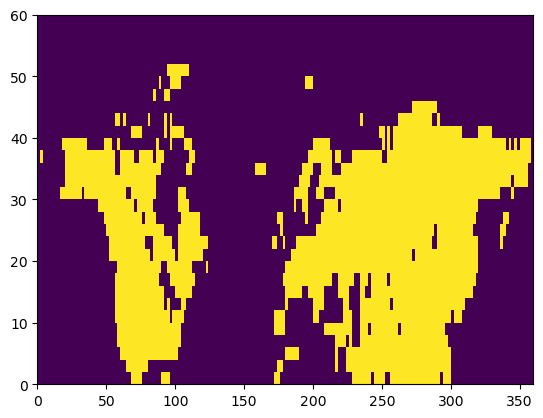

In [25]:
plt.pcolormesh(mask)